<a href="https://colab.research.google.com/github/Tawhidahmedchetan/INSE6220_Project/blob/main/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principal Componenet Analysis of Chronic Kidney Disease using Machine Learning
### Author: Shaneela Zaheed
### ID: 40258689

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 25.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 95.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.1'

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.0.3
Seaborn version:  0.13.1


In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/ShaneelaZaheed/INSE-6220-Project/main/ChronicKidneyDisease.csv')
df.head(5)

Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0  80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1  50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2  80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3  70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  11.2  6700.0  3.90   
4  80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   

   Htn  Class  
0  1.0      1  
1  0.0      1  
2  0.0      1  
3  1.0      1  
4  0.0      1

In [ ]:
# Remove'#NUM!' values
df.replace('#NUM!', np.nan, inplace=True)

In [ ]:
#convert this dataset to float
df = df.astype('float64')

In [ ]:
# Count the nan and drop them
df.isna().any(axis=1).sum()
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    float64
dtypes: float64(14)
memory usage: 43.9 KB


In [ ]:
print("Dataset Shape", df.shape)

Dataset Shape (400, 14)


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [ ]:
print("Dataset Shape", df.shape)

Dataset Shape (400, 14)


**Exploratory Data Analysis**

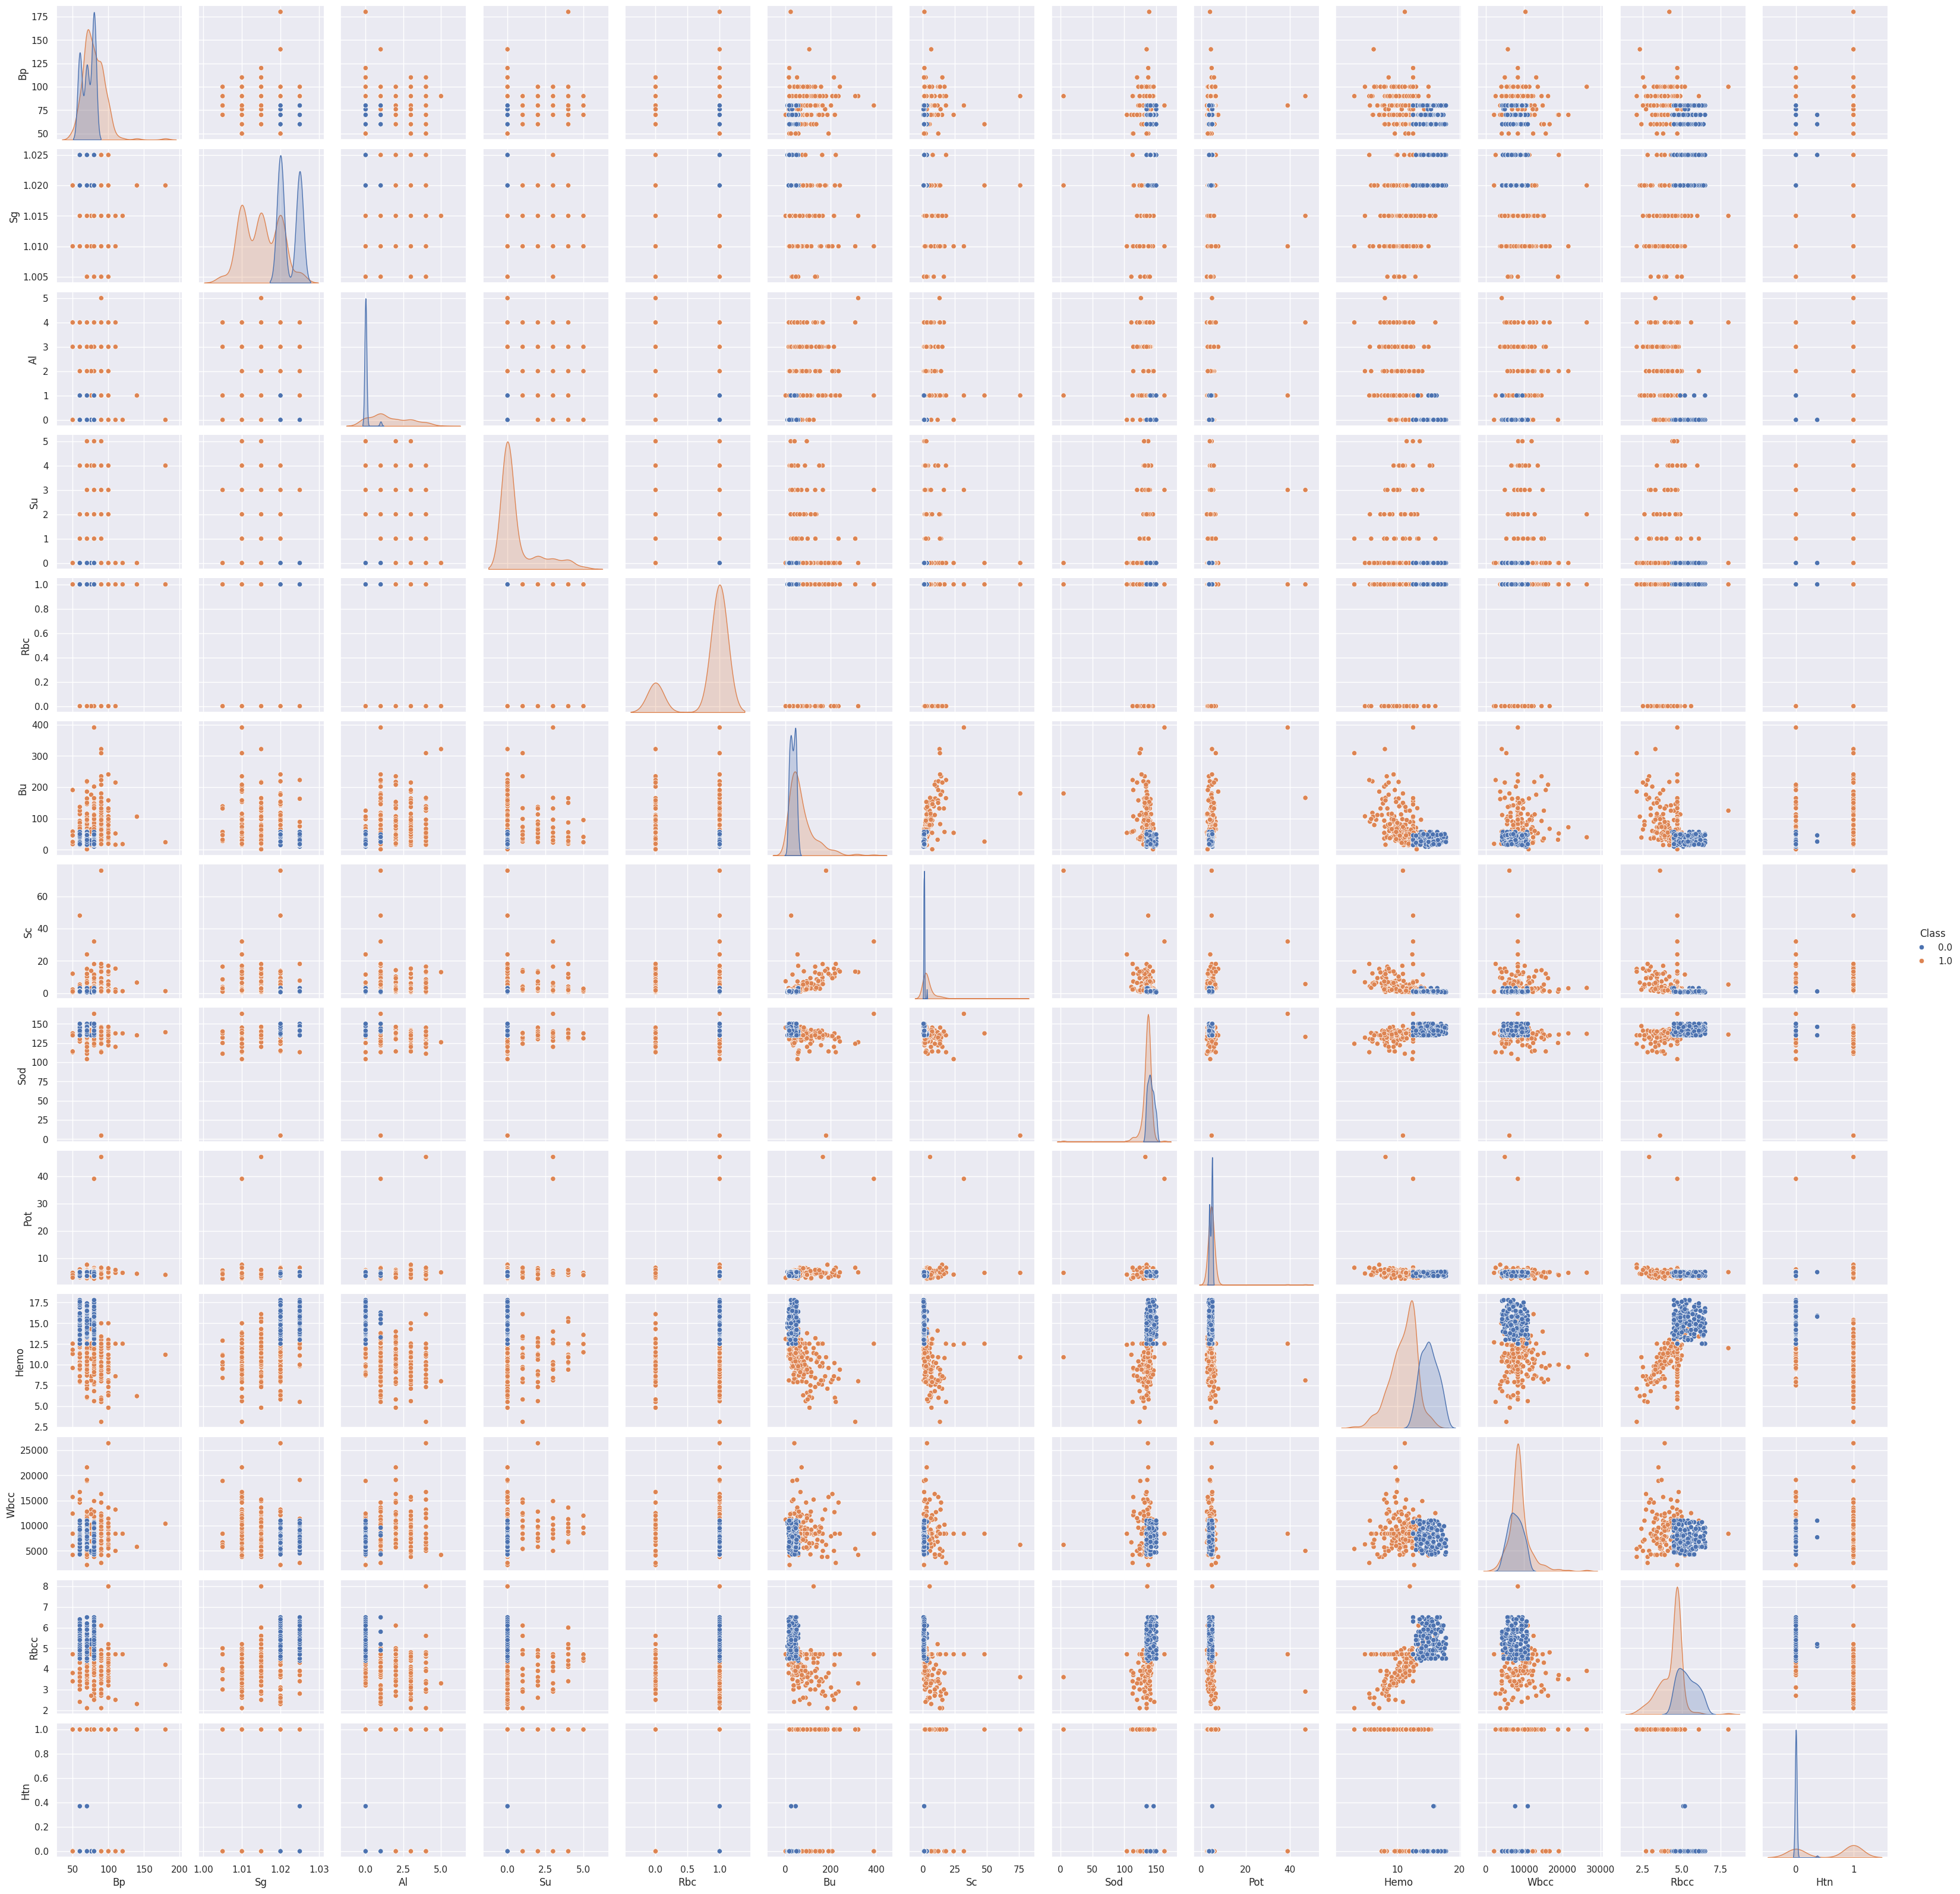

In [ ]:
sns.pairplot(df, hue='Class')
plt.show()

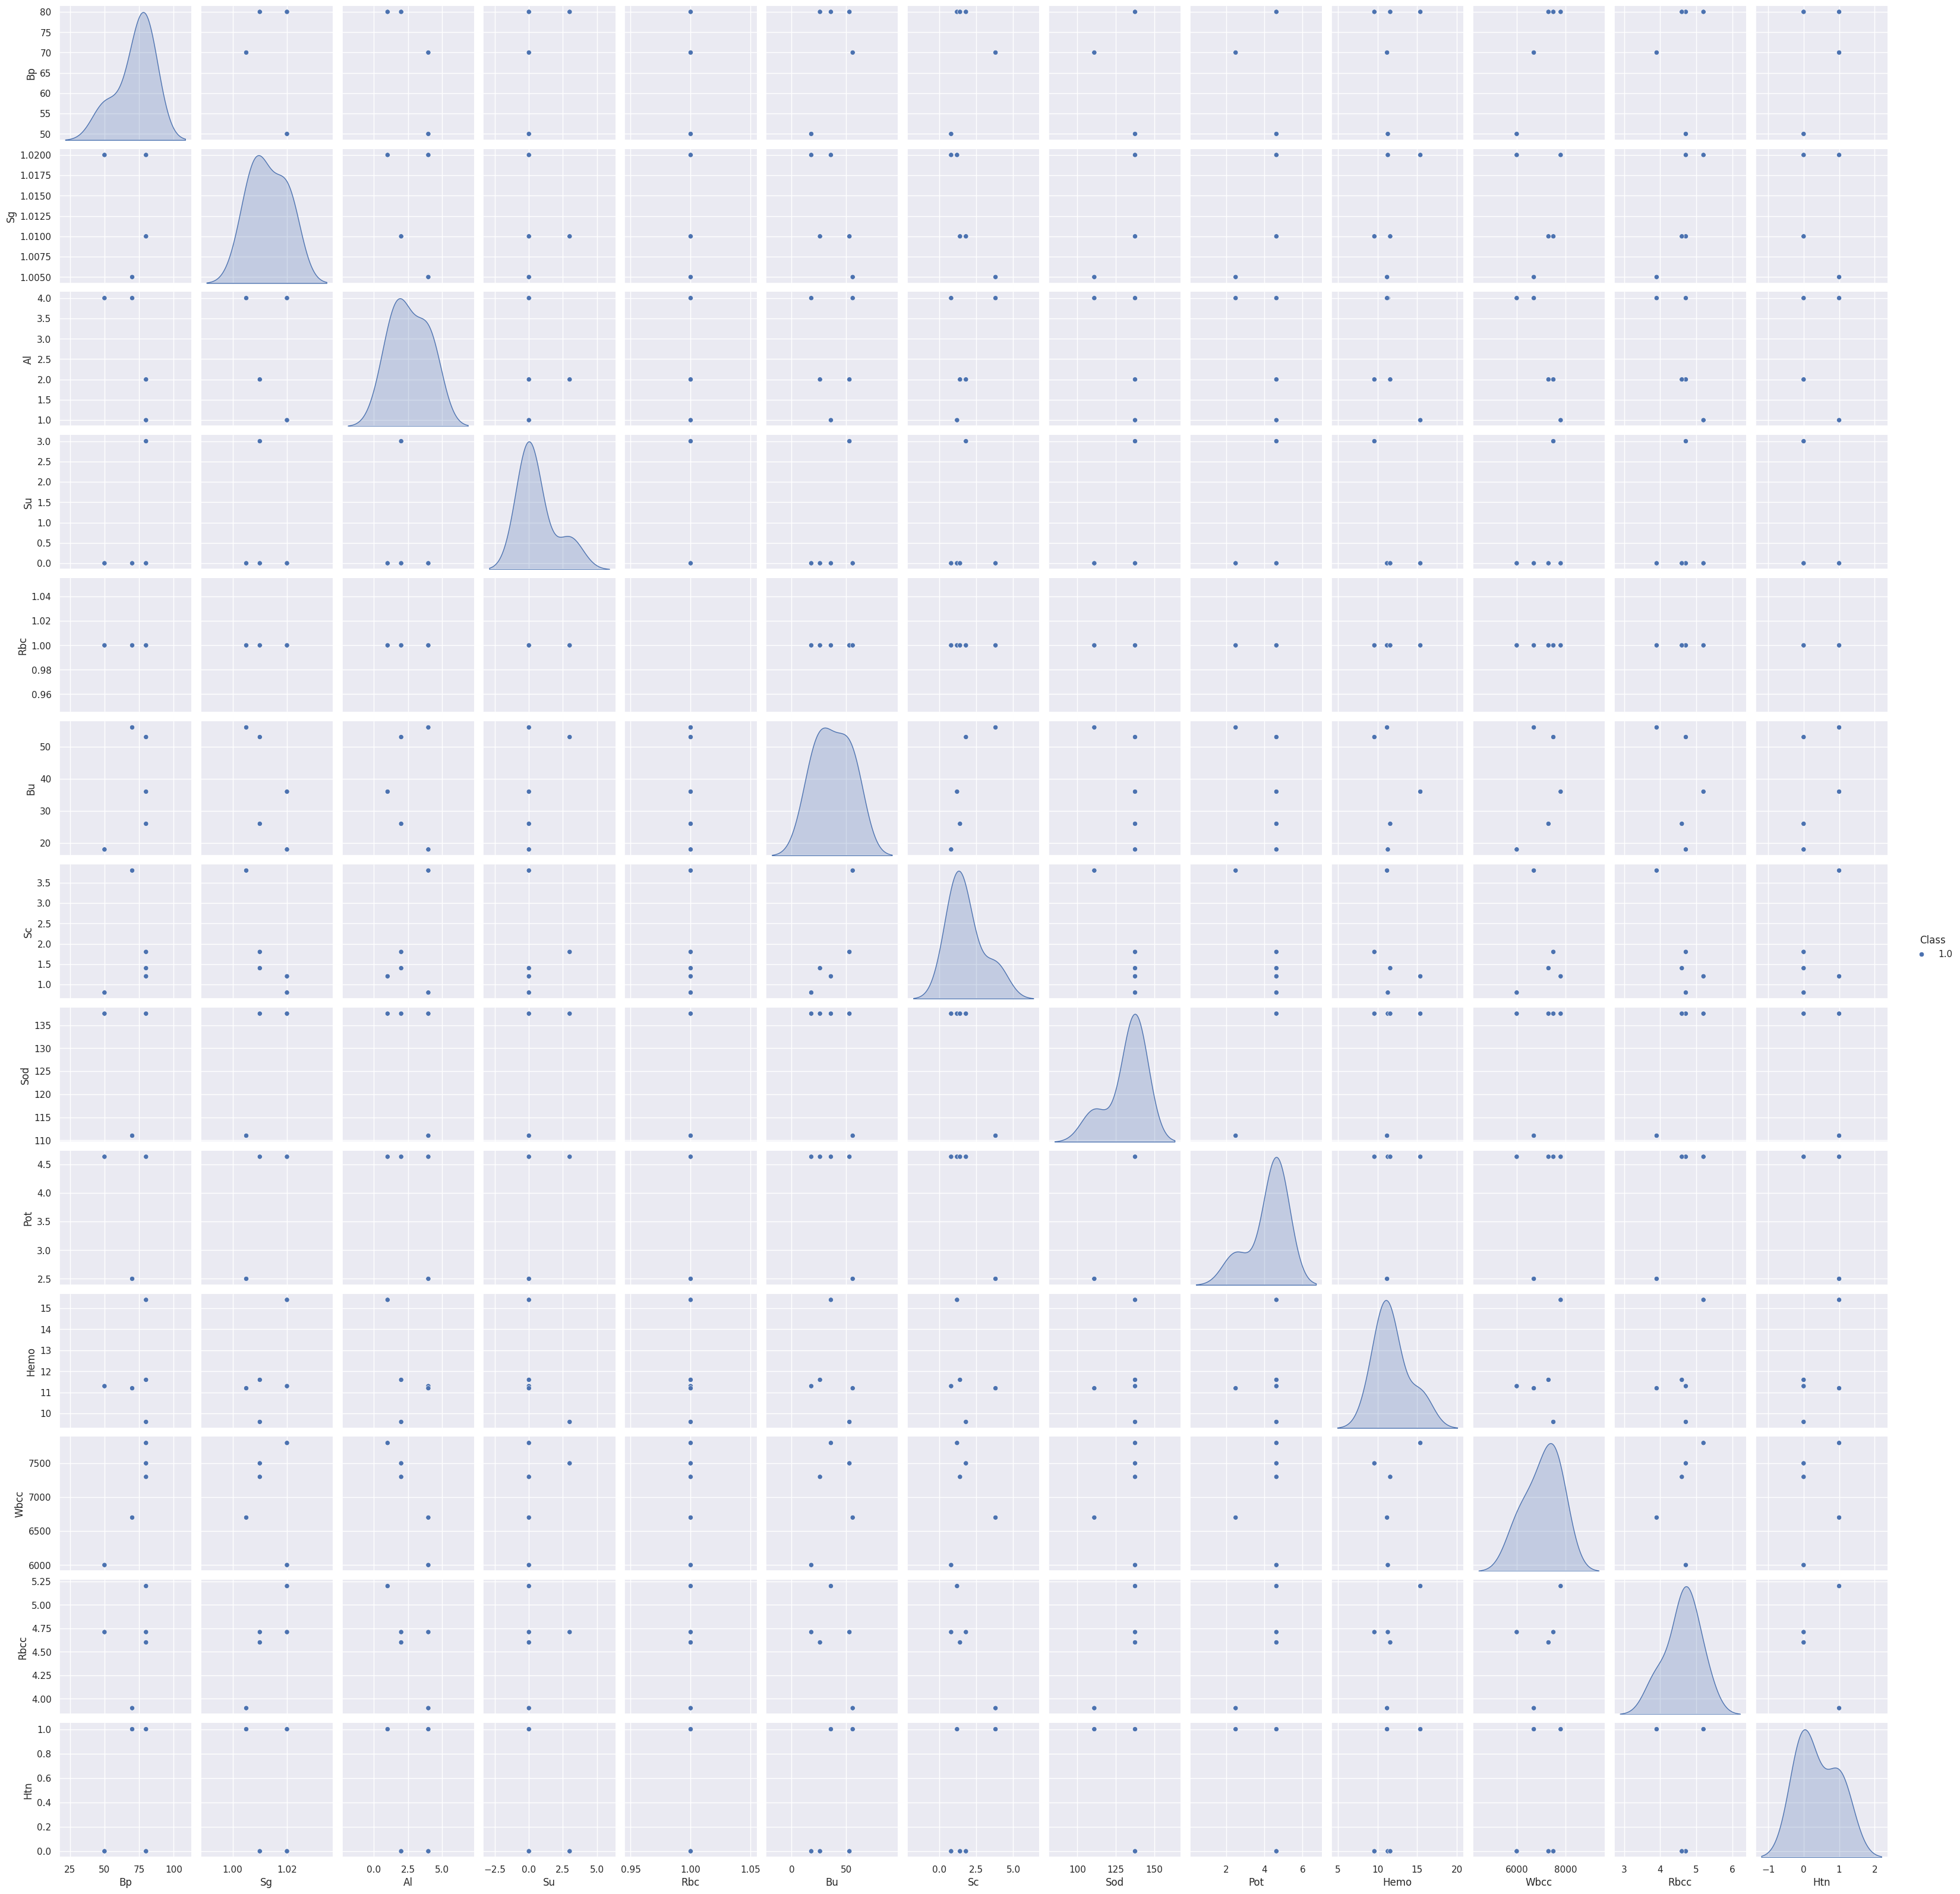

In [ ]:
sns.pairplot(df[0:5], hue='Class')
plt.show()

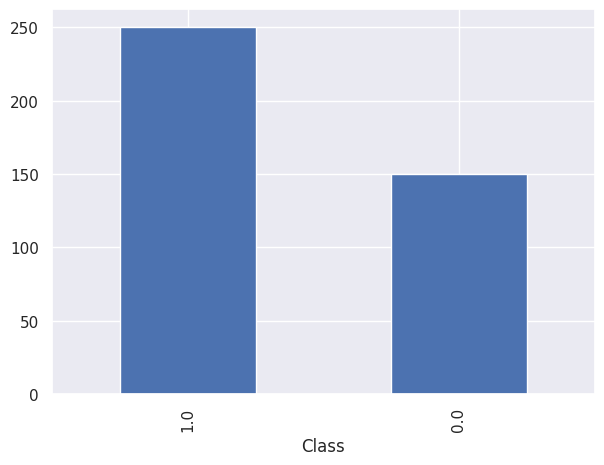

In [ ]:
y = df['Class']
y.value_counts().plot(kind='bar')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['Class'])
X.head(10)

Bp     Sg   Al   Su  Rbc     Bu    Sc     Sod   Pot  Hemo     Wbcc  \
0   80.0  1.020  1.0  0.0  1.0   36.0   1.2  137.53  4.63  15.4   7800.0   
1   50.0  1.020  4.0  0.0  1.0   18.0   0.8  137.53  4.63  11.3   6000.0   
2   80.0  1.010  2.0  3.0  1.0   53.0   1.8  137.53  4.63   9.6   7500.0   
3   70.0  1.005  4.0  0.0  1.0   56.0   3.8  111.00  2.50  11.2   6700.0   
4   80.0  1.010  2.0  0.0  1.0   26.0   1.4  137.53  4.63  11.6   7300.0   
5   90.0  1.015  3.0  0.0  1.0   25.0   1.1  142.00  3.20  12.2   7800.0   
6   70.0  1.010  0.0  0.0  1.0   54.0  24.0  104.00  4.00  12.4   8406.0   
7   76.0  1.015  2.0  4.0  1.0   31.0   1.1  137.53  4.63  12.4   6900.0   
8  100.0  1.015  3.0  0.0  1.0   60.0   1.9  137.53  4.63  10.8   9600.0   
9   90.0  1.020  2.0  0.0  0.0  107.0   7.2  114.00  3.70   9.5  12100.0   

   Rbcc  Htn  
0  5.20  1.0  
1  4.71  0.0  
2  4.71  0.0  
3  3.90  1.0  
4  4.60  0.0  
5  4.40  1.0  
6  4.71  0.0  
7  5.00  0.0  
8  4.00  1.0  
9  3.70  1.0

In [ ]:
X.describe().transpose()

count         mean          std       min       25%      50%       75%  \
Bp    400.0    76.455000    13.476536    50.000    70.000    78.00    80.000   
Sg    400.0     1.017712     0.005434     1.005     1.015     1.02     1.020   
Al    400.0     1.015000     1.272329     0.000     0.000     1.00     2.000   
Su    400.0     0.395000     1.040038     0.000     0.000     0.00     0.000   
Rbc   400.0     0.882500     0.322418     0.000     1.000     1.00     1.000   
Bu    400.0    57.405500    49.285970     1.500    27.000    44.00    61.750   
Sc    400.0     3.072350     5.617490     0.400     0.900     1.40     3.070   
Sod   400.0   137.529025     9.204273     4.500   135.000   137.53   141.000   
Pot   400.0     4.627850     2.819783     2.500     4.000     4.63     4.800   
Hemo  400.0    12.526900     2.716171     3.100    10.875    12.53    14.625   
Wbcc  400.0  8406.090000  2523.219976  2200.000  6975.000  8406.00  9400.000   
Rbcc  400.0     4.708275     0.840315     2.100     4.500     4.71     5.100   
Htn   400.0     0.369350     0.482023     0.000     0.000     0.00     1.000   

            max  
Bp      180.000  
Sg        1.025  
Al        5.000  
Su        5.000  
Rbc       1.000  
Bu      391.000  
Sc       76.000  
Sod     163.000  
Pot      47.000  
Hemo     17.800  
Wbcc  26400.000  
Rbcc      8.000  
Htn       1.000

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Bp        Sg        Al        Su       Rbc        Bu        Sc  \
0  0.263379  0.421486 -0.011804 -0.380269  0.364890 -0.434856 -0.333725   
1 -1.965500  0.421486  2.349029 -0.380269  0.364890 -0.800529 -0.405020   
2  0.263379 -1.421074  0.775140  2.507853  0.364890 -0.089498 -0.226782   
3 -0.479581 -2.342354  2.349029 -0.380269  0.364890 -0.028553  0.129695   
4  0.263379 -1.421074  0.775140 -0.380269  0.364890 -0.638008 -0.298077   
5  1.006339 -0.499794  1.562084 -0.380269  0.364890 -0.658323 -0.351548   
6 -0.479581 -1.421074 -0.798748 -0.380269  0.364890 -0.069183  3.730110   
7 -0.033805 -0.499794  0.775140  3.470560  0.364890 -0.536432 -0.351548   
8  1.749299 -0.499794  1.562084 -0.380269  0.364890  0.052708 -0.208958   
9  1.006339  0.421486  0.775140 -0.380269 -2.740554  1.007520  0.735706   

        Sod       Pot      Hemo      Wbcc      Rbcc       Htn  
0  0.000106  0.000763  1.059100 -0.240506  0.585900  1.309979  
1  0.000106  0.000763 -0.452268 -0.954773  0.002055 -0.767210  
2  0.000106  0.000763 -1.078932 -0.359550  0.002055 -0.767210  
3 -2.885860 -0.755560 -0.489130 -0.677003 -0.963076  1.309979  
4  0.000106  0.000763 -0.341680 -0.438913 -0.129012 -0.767210  
5  0.486358 -0.507003 -0.120504 -0.240506 -0.367316  1.309979  
6 -3.647329 -0.222938 -0.046779 -0.000036  0.002055 -0.767210  
7  0.000106  0.000763 -0.046779 -0.597640  0.347596 -0.767210  
8  0.000106  0.000763 -0.636581  0.473762 -0.843924  1.309979  
9 -2.559517 -0.329462 -1.115795  1.465800 -1.201380  1.309979

In [ ]:
X.describe().transpose()

count          mean       std        min       25%       50%       75%  \
Bp    400.0  1.598721e-16  1.001252  -1.965500 -0.479581  0.114787  0.263379   
Sg    400.0  3.183231e-14  1.001252  -2.342354 -0.499794  0.421486  0.421486   
Al    400.0  7.105427e-17  1.001252  -0.798748 -0.798748 -0.011804  0.775140   
Su    400.0 -7.105427e-17  1.001252  -0.380269 -0.380269 -0.380269 -0.380269   
Rbc   400.0  2.131628e-16  1.001252  -2.740554  0.364890  0.364890  0.364890   
Bu    400.0 -8.881784e-17  1.001252  -1.135729 -0.617693 -0.272335  0.088259   
Sc    400.0  0.000000e+00  1.001252  -0.476315 -0.387196 -0.298077 -0.000419   
Sod   400.0  1.101341e-15  1.001252 -14.471063 -0.275110  0.000106  0.377577   
Pot   400.0 -1.687539e-16  1.001252  -0.755560 -0.222938  0.000763  0.061127   
Hemo  400.0 -4.618528e-16  1.001252  -3.475004 -0.608934  0.001143  0.773415   
Wbcc  400.0 -7.105427e-17  1.001252  -2.462672 -0.567878 -0.000036  0.394399   
Rbcc  400.0 -5.329071e-16  1.001252  -3.107812 -0.248164  0.002055  0.466748   
Htn   400.0 -1.065814e-16  1.001252  -0.767210 -0.767210 -0.767210  1.309979   

            max  
Bp     7.692977  
Sg     1.342766  
Al     3.135973  
Su     4.433268  
Rbc    0.364890  
Bu     6.777025  
Sc    12.998506  
Sod    2.770764  
Pot   15.045561  
Hemo   1.943804  
Wbcc   7.140259  
Rbcc   3.922156  
Htn    1.309979

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

[Text(0, 0, 'Bp'),
 Text(1, 0, 'Sg'),
 Text(2, 0, 'Al'),
 Text(3, 0, 'Su'),
 Text(4, 0, 'Rbc'),
 Text(5, 0, 'Bu'),
 Text(6, 0, 'Sc'),
 Text(7, 0, 'Sod'),
 Text(8, 0, 'Pot'),
 Text(9, 0, 'Hemo'),
 Text(10, 0, 'Wbcc'),
 Text(11, 0, 'Rbcc'),
 Text(12, 0, 'Htn')]

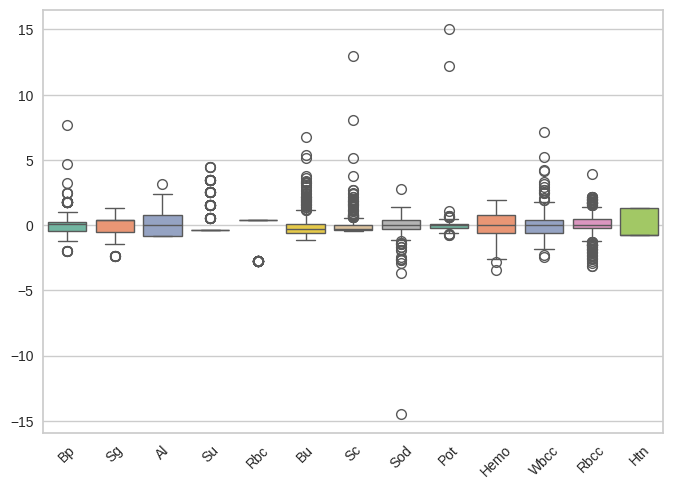

In [106]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

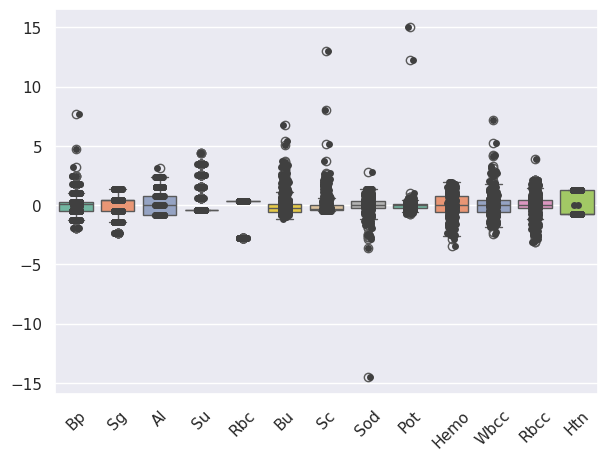

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

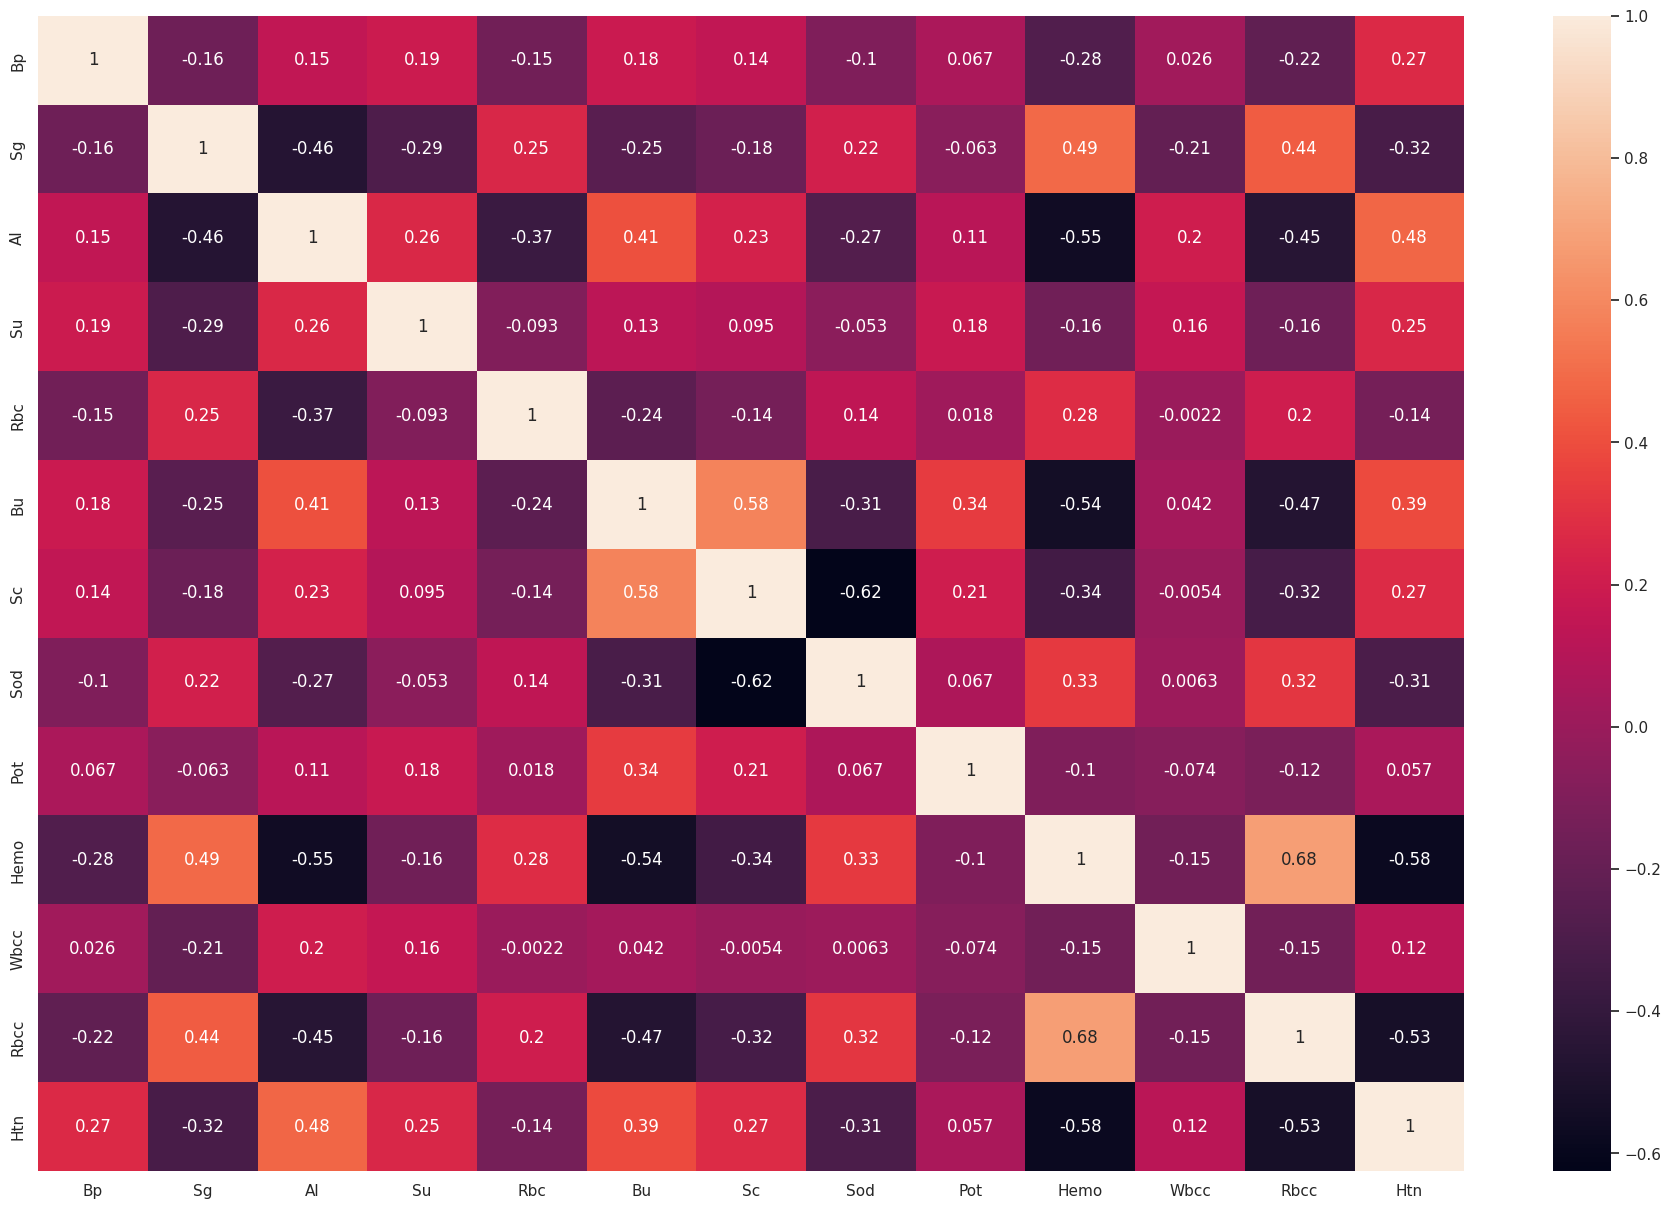

In [ ]:
plt.figure(figsize=(23, 15))
sns.heatmap(X.corr(), annot=True)
plt.show()
# ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.9, annot=True, cbar=False, square=True)
# plt.yticks(rotation=0)
# ax.tick_params(labelbottom=False,labeltop=True)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

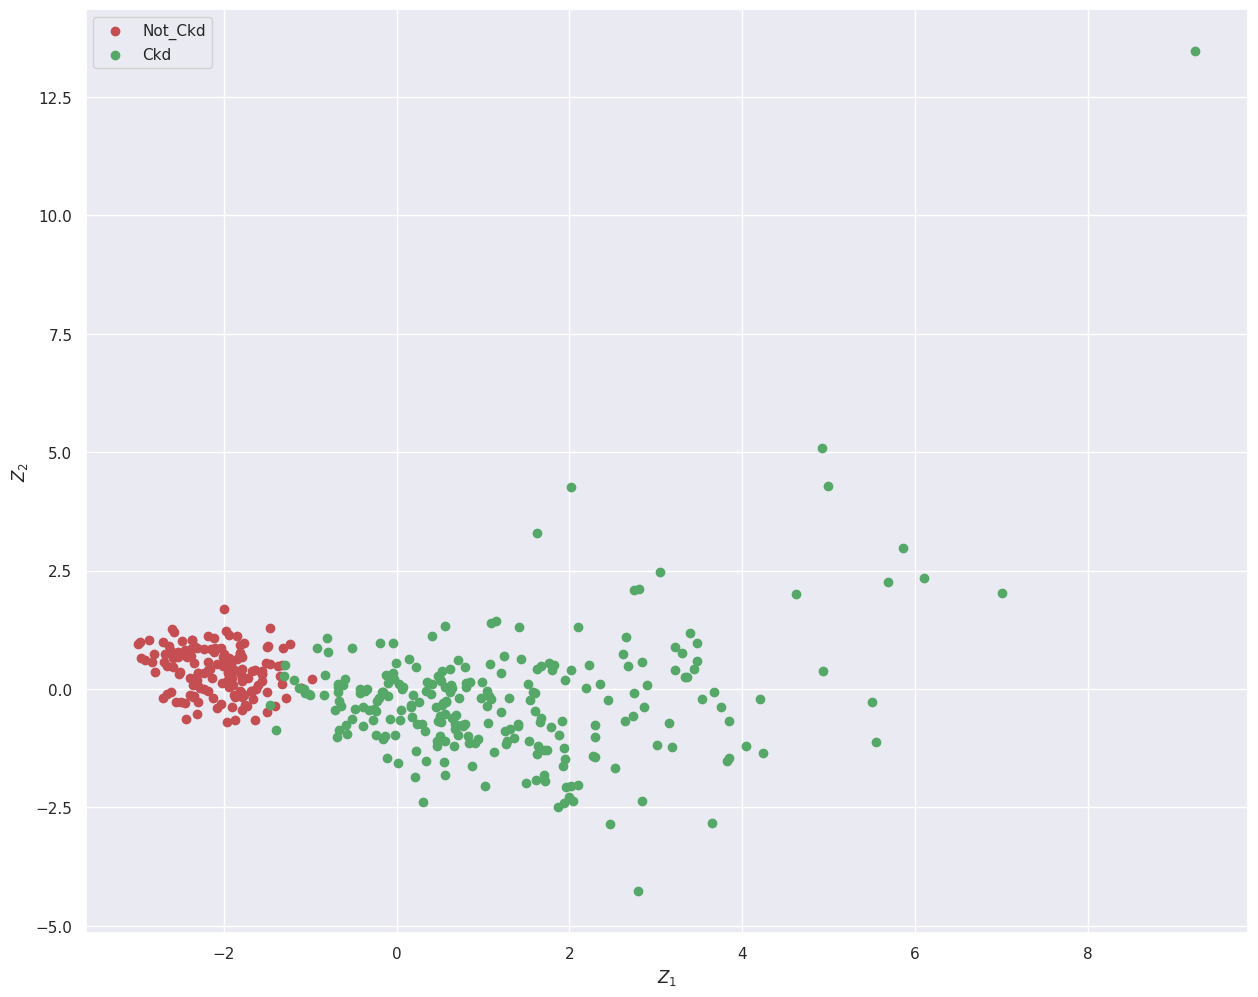

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# Not Ckd->0,  Ckd->1
not_Ckd = np.where(y == 0)
Ckd = np.where(y == 1)

plt.figure(figsize=(15, 12))

plt.scatter(Z[not_Ckd,0], Z[not_Ckd,1], c='r', label='Not_Ckd')
plt.scatter(Z[Ckd,0], Z[Ckd,1], c='g', label='Ckd')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

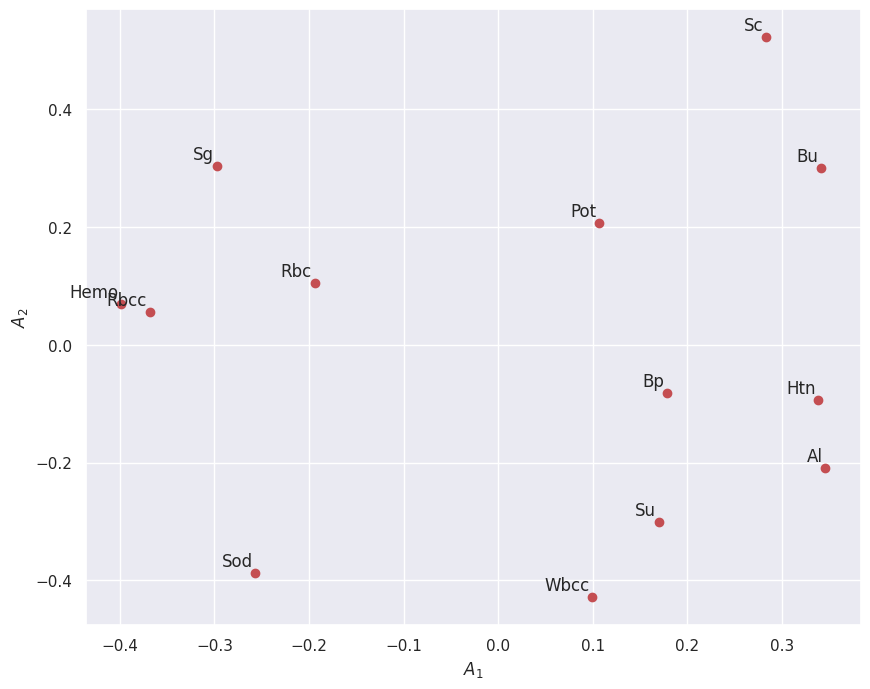

In [ ]:
A = pca.components_.T
plt.figure(figsize=(10, 8))
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

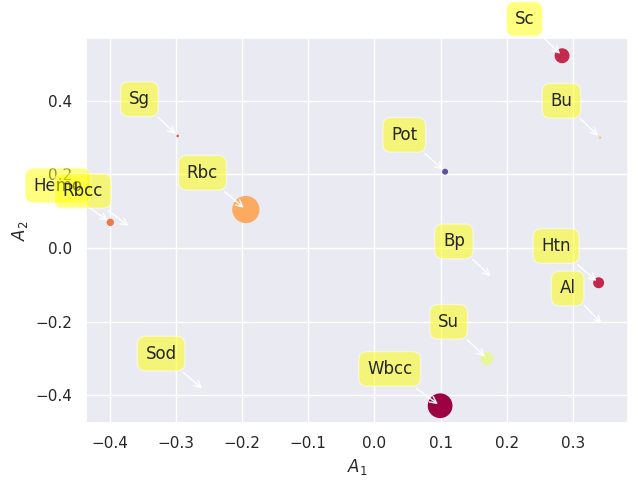

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

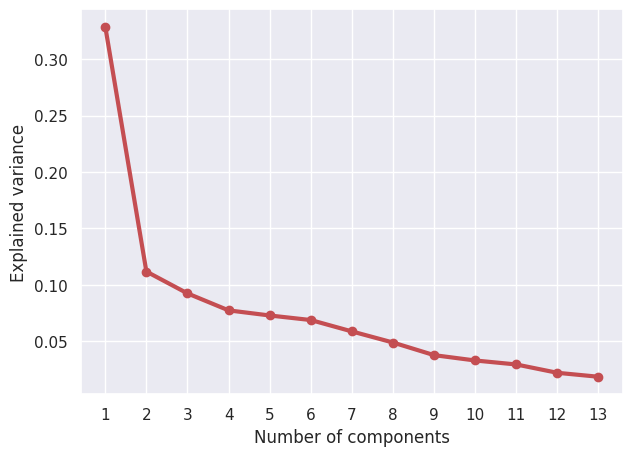

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

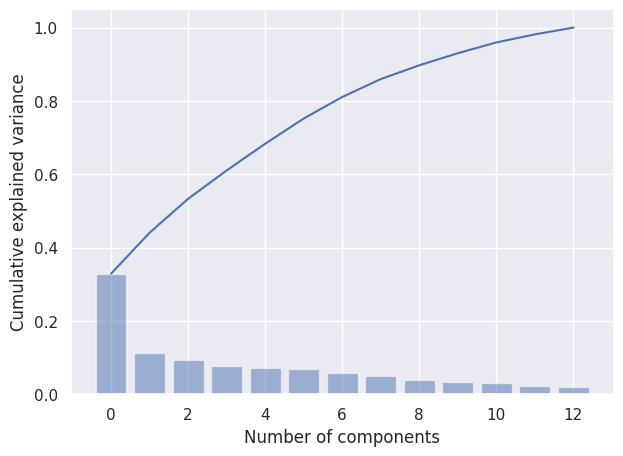

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

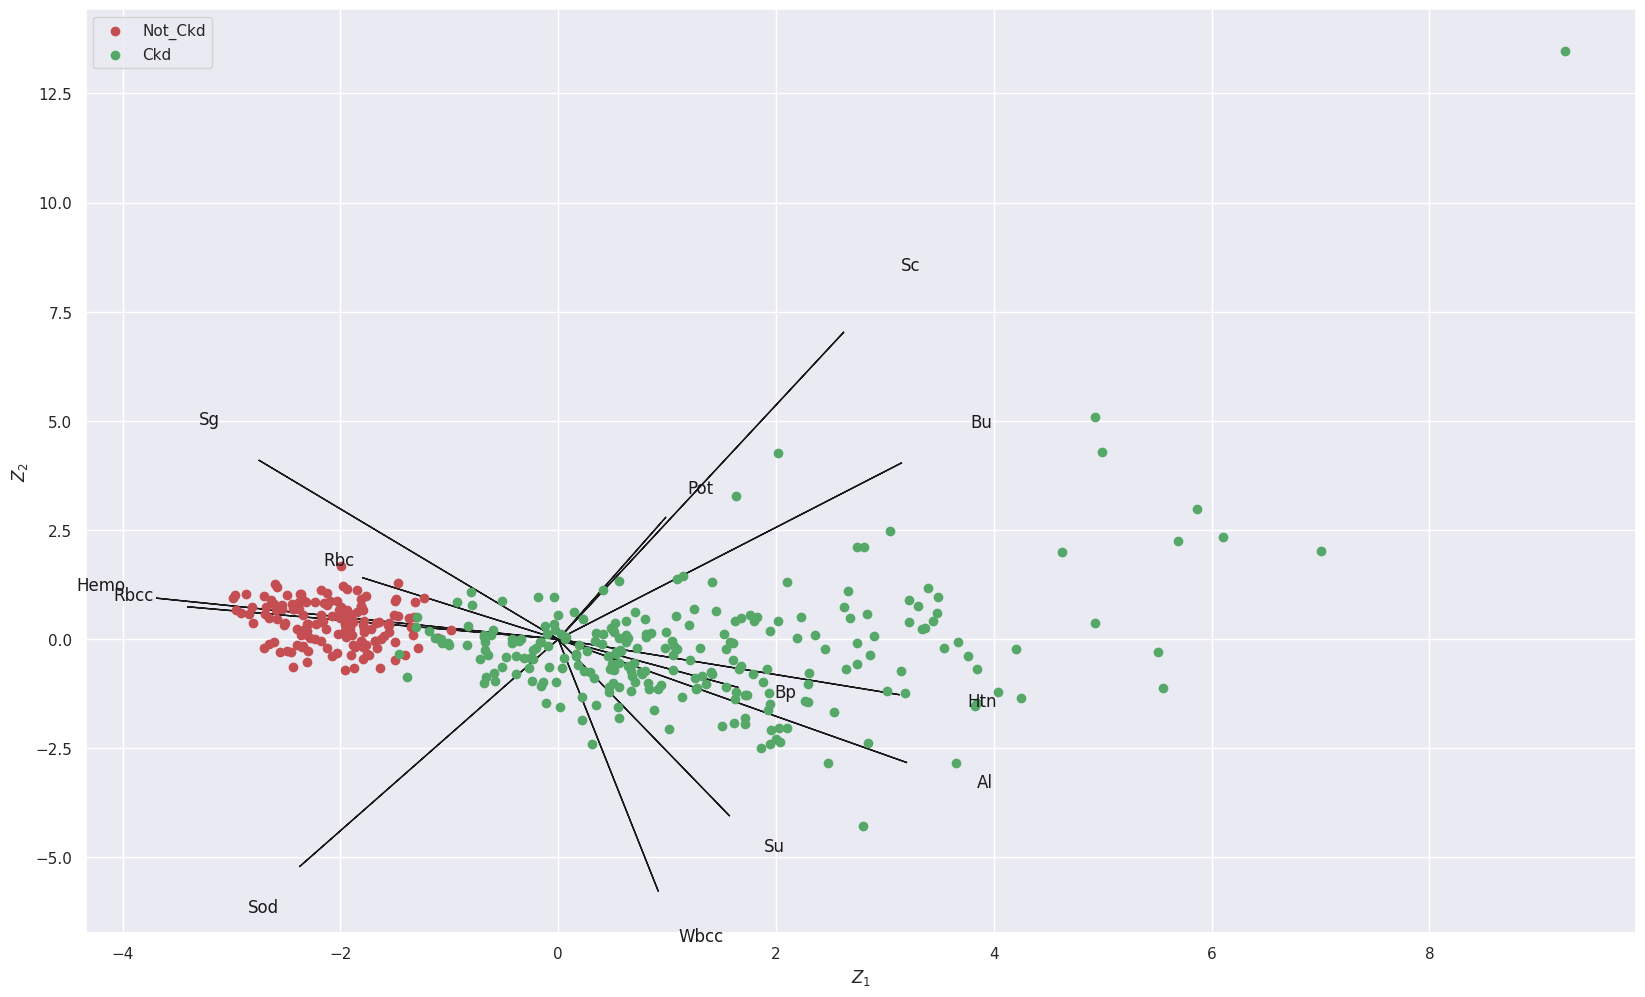

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure(figsize= (20, 12))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[not_Ckd,0], Z[not_Ckd,1], c='r', label='Not_Ckd')
plt.scatter(Z[Ckd,0], Z[Ckd,1], c='g', label='Ckd')

plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [11] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[11]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.679171  0.042497 -0.019648  0.047108  0.725674 -0.273462 -0.334627   
1   -0.361528 -0.052285 -0.532571 -0.185610 -1.976375 -0.315202 -1.567936   
2    1.132683 -1.325864  1.006002  0.081473  0.298896  1.291387 -1.340474   
3    2.901598  0.083327 -2.137478  0.404215 -0.308436  0.259865 -2.202152   
4    0.180502 -0.581785 -0.211043 -0.349127 -0.201860 -0.137282 -0.555213   
..        ...       ...       ...       ...       ...       ...       ...   
395 -1.894343  0.088203  0.781809 -0.552850  0.229629 -0.450899  0.194502   
396 -2.836551  0.579464 -0.056162  0.015981  0.072570  0.604537  0.296188   
397 -1.942530  0.519700  0.052913 -0.354102  0.565467  0.336405 -0.087170   
398 -2.180736  1.116049 -0.043468  0.217818 -0.585545  0.331105 -0.172453   
399 -2.691591  0.575460  0.021553 -0.433099  0.741511  0.440147  0.259764   

          PC8       PC9      PC10      PC11  
0   -0.859509  0.916392  0.125190  0.900073  
1   -0.590146  1.237853 -0.239913 -1.714584  
2    0.884089 -0.418502 -0.795271 -1.009279  
3    0.830300  1.941865 -0.137238 -0.237837  
4    1.518605  0.838714 -0.336591 -0.538079  
..        ...       ...       ...       ...  
395  0.310672 -0.358045 -0.292605 -0.035513  
396 -0.705393  0.248438 -0.384528  0.203644  
397  0.363133  0.311445  0.053125  0.004265  
398 -0.654447  0.052557 -0.050356  0.013336  
399 -0.476962  0.375938 -0.293917  0.015466  

[400 rows x 11 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '11 Principal Components explain [98.15%] of the variance'}, xlabel='PC1 (32.8% expl.var)', ylabel='PC2 (11.1% expl.var)'>)

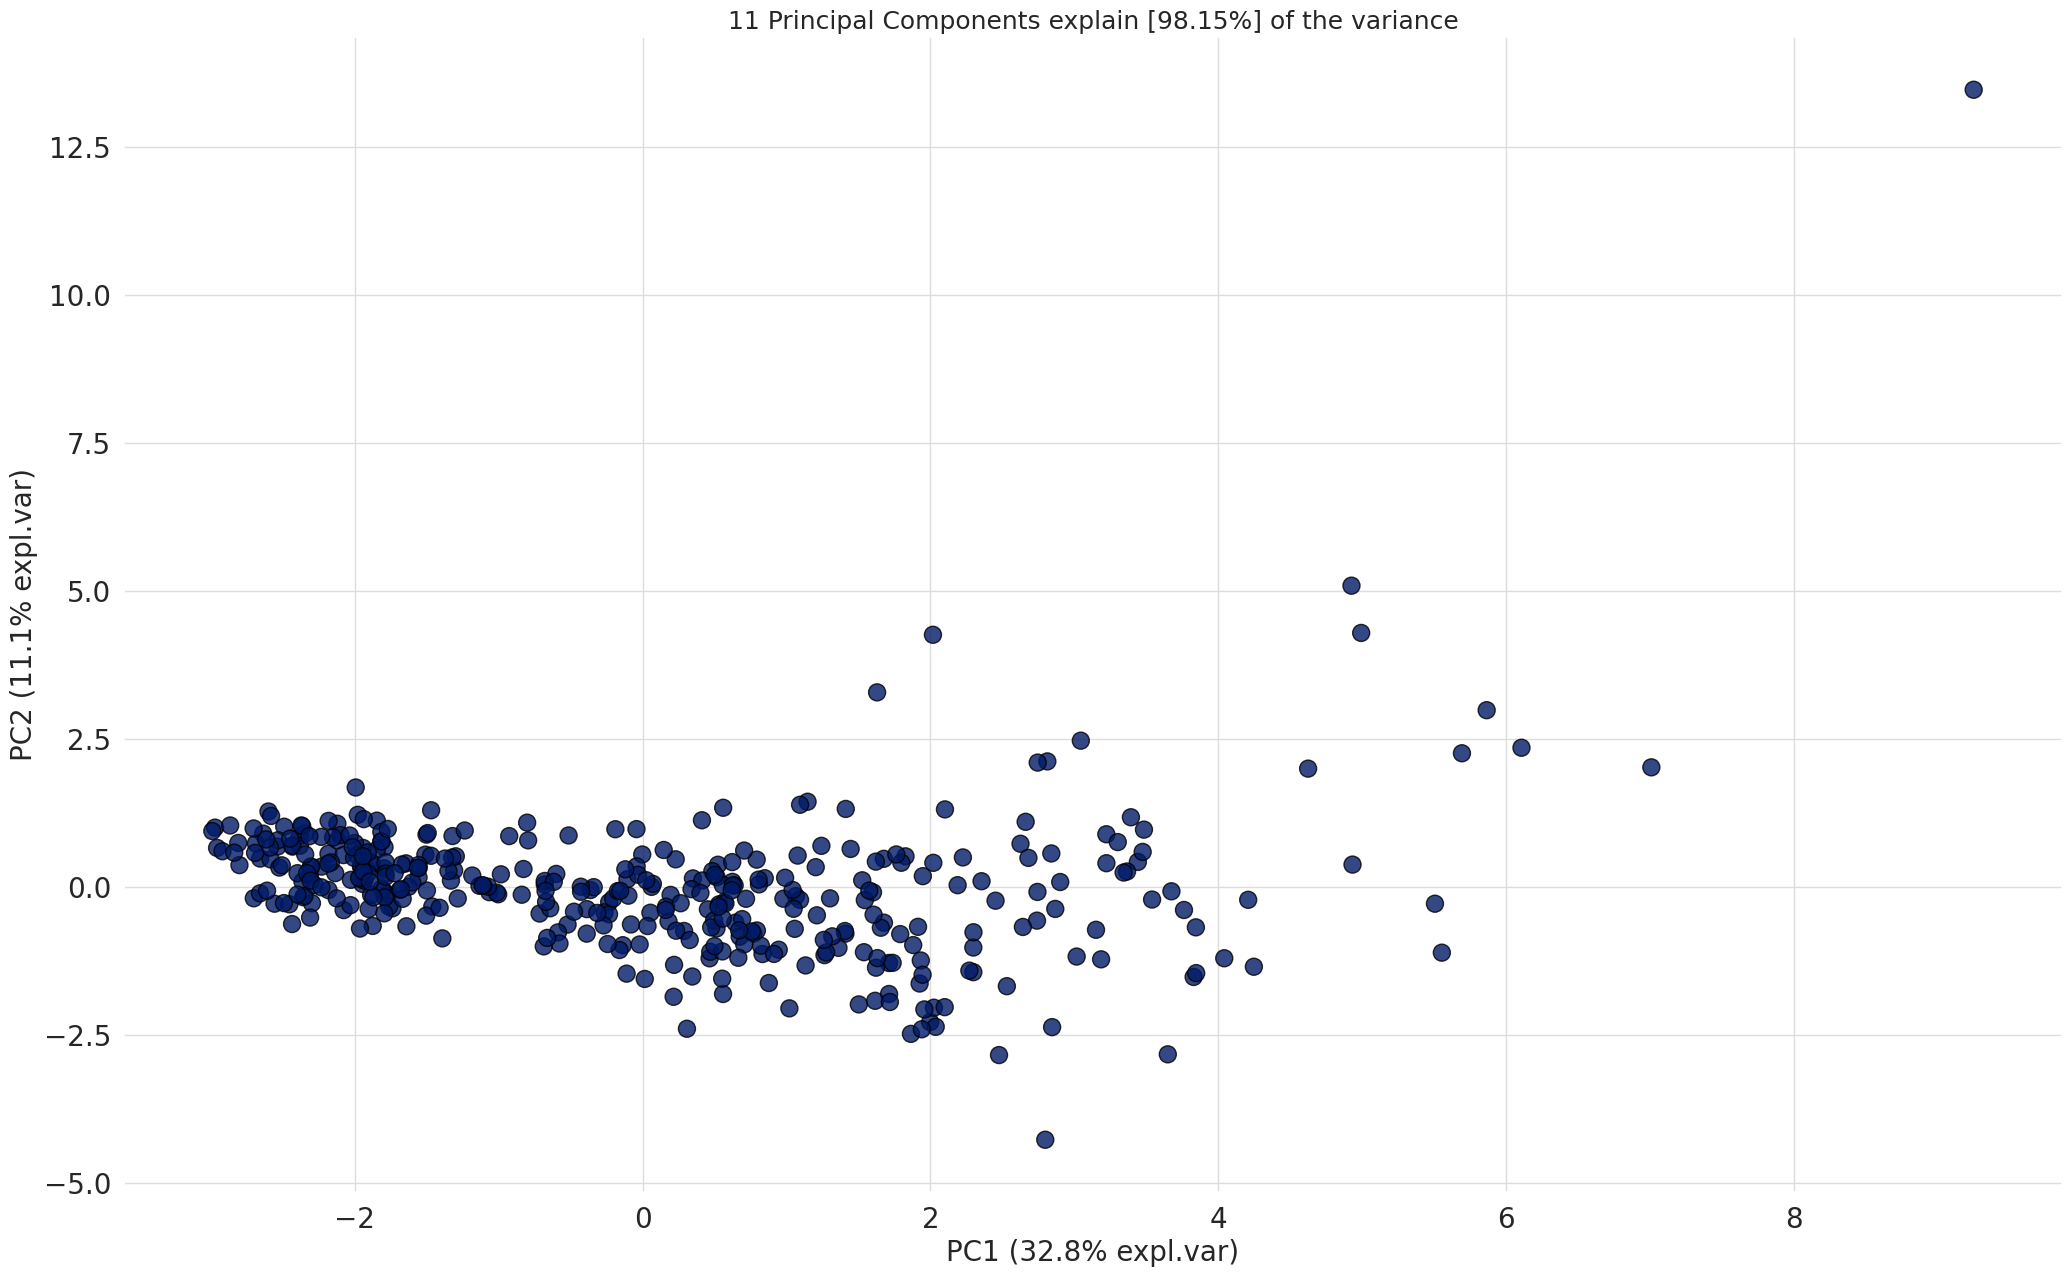

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

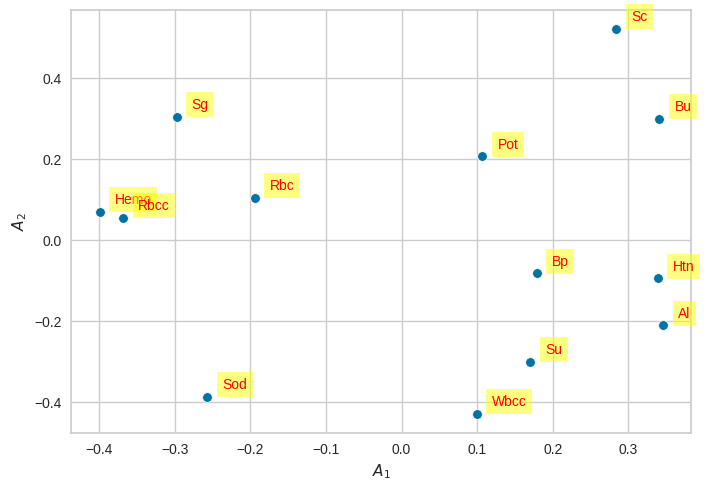

In [107]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

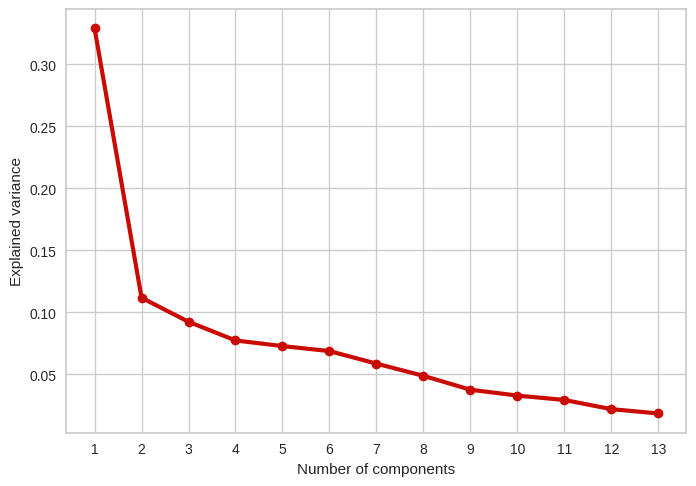

In [108]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

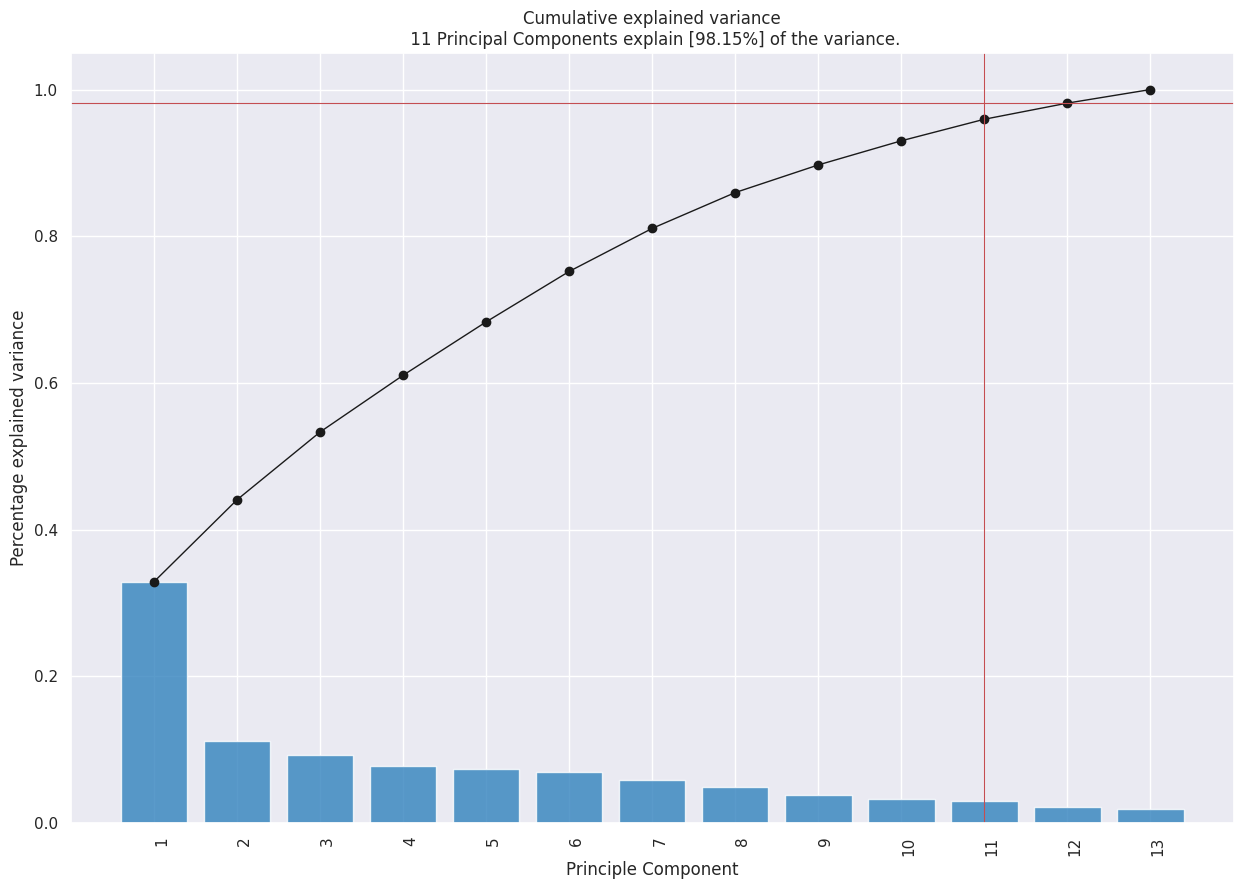

In [ ]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '11 Principal Components explain [98.15%] of the variance'}, xlabel='PC1 (32.8% expl.var)', ylabel='PC2 (11.1% expl.var)'>)

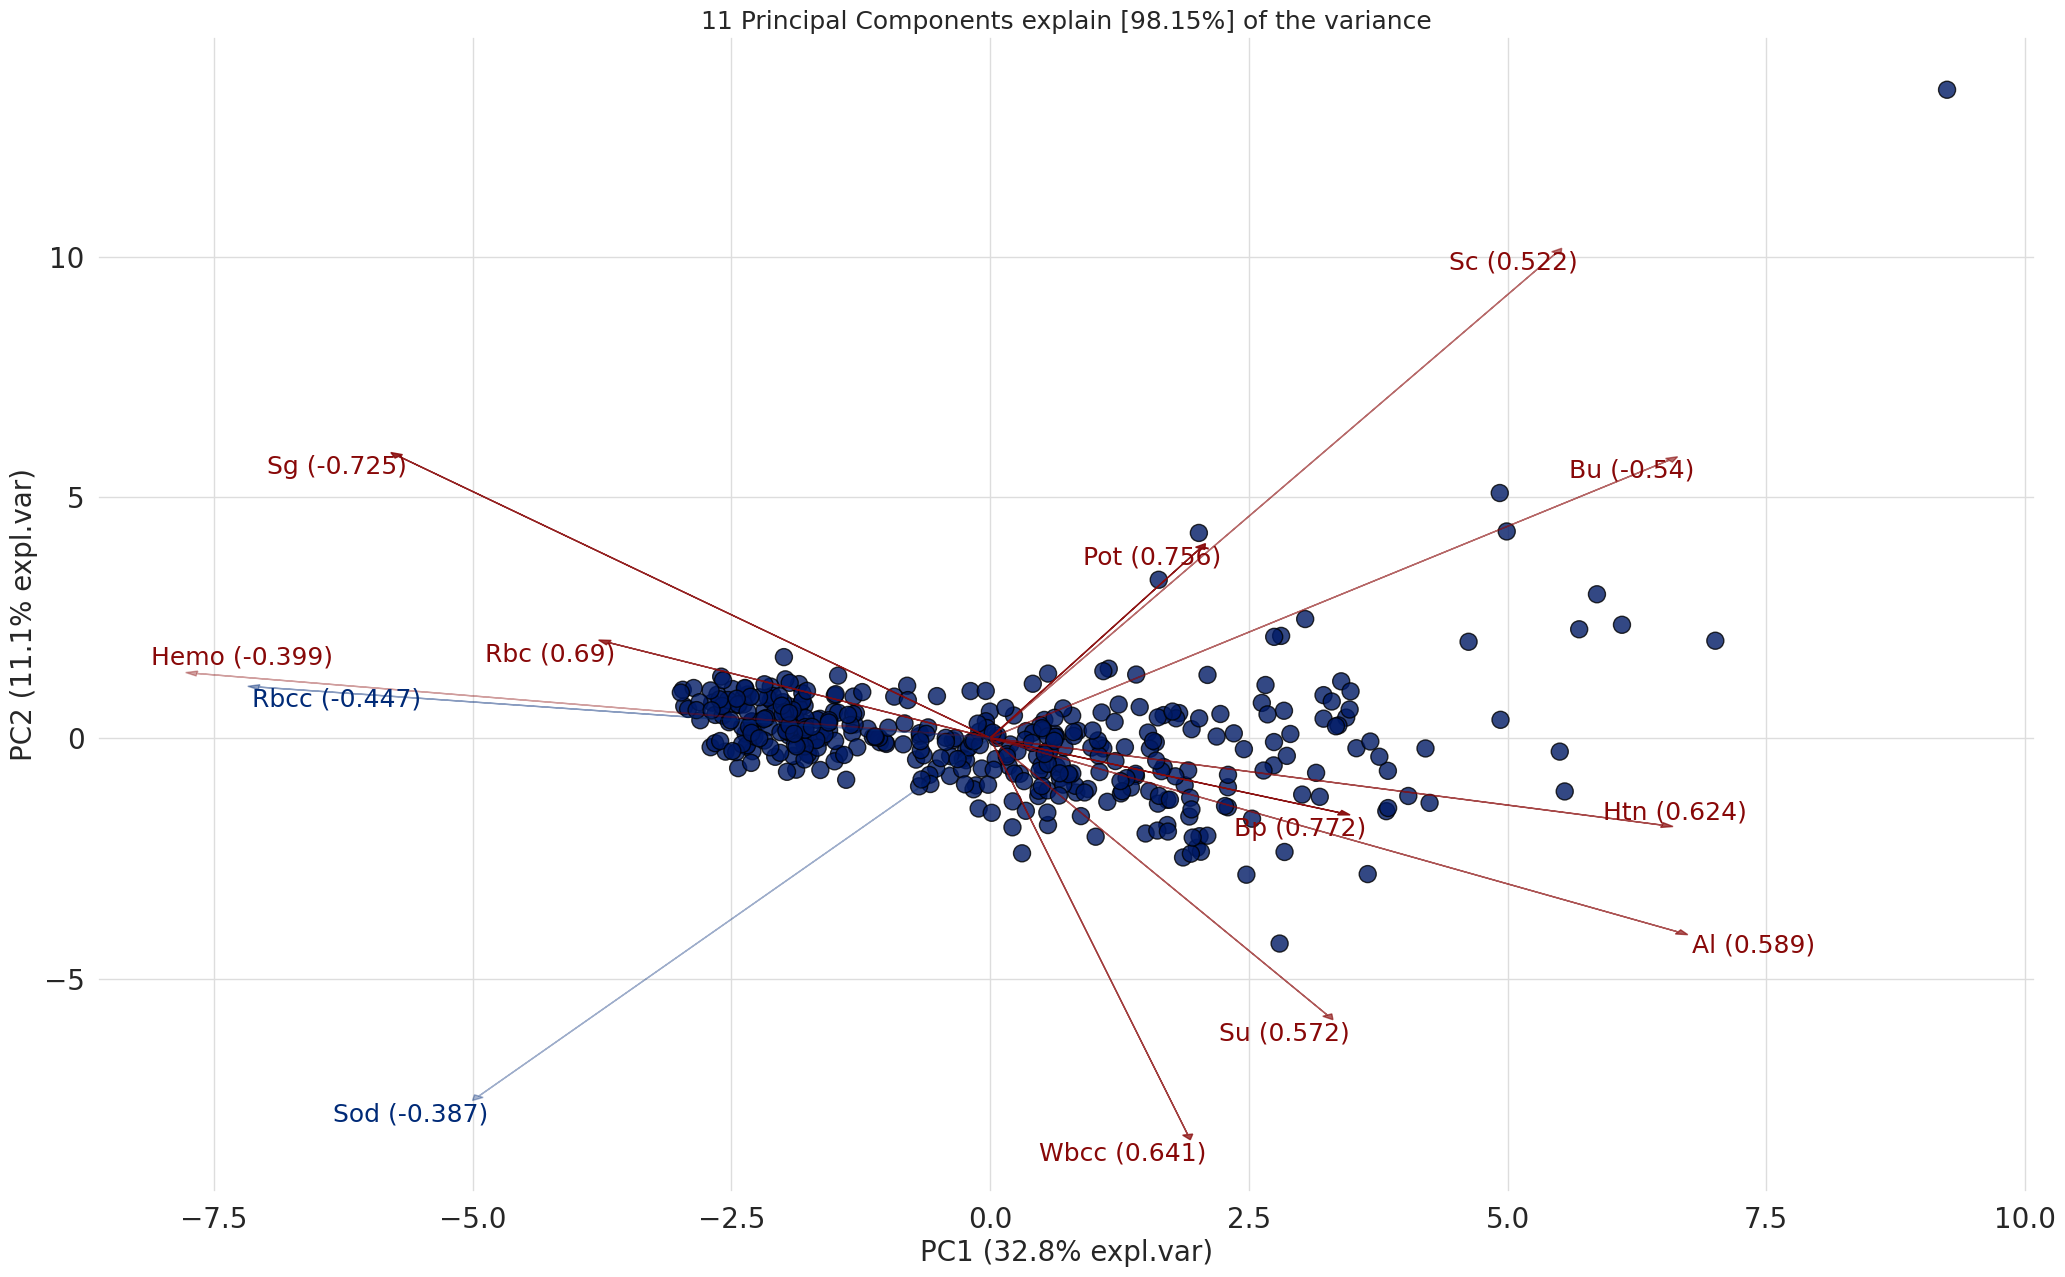

In [ ]:
model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '11 Principal Components explain [98.15%] of the variance'}, xlabel='PC1 (32.8% expl.var)', ylabel='PC2 (11.1% expl.var)', zlabel='PC3 (9.24% expl.var)'>)

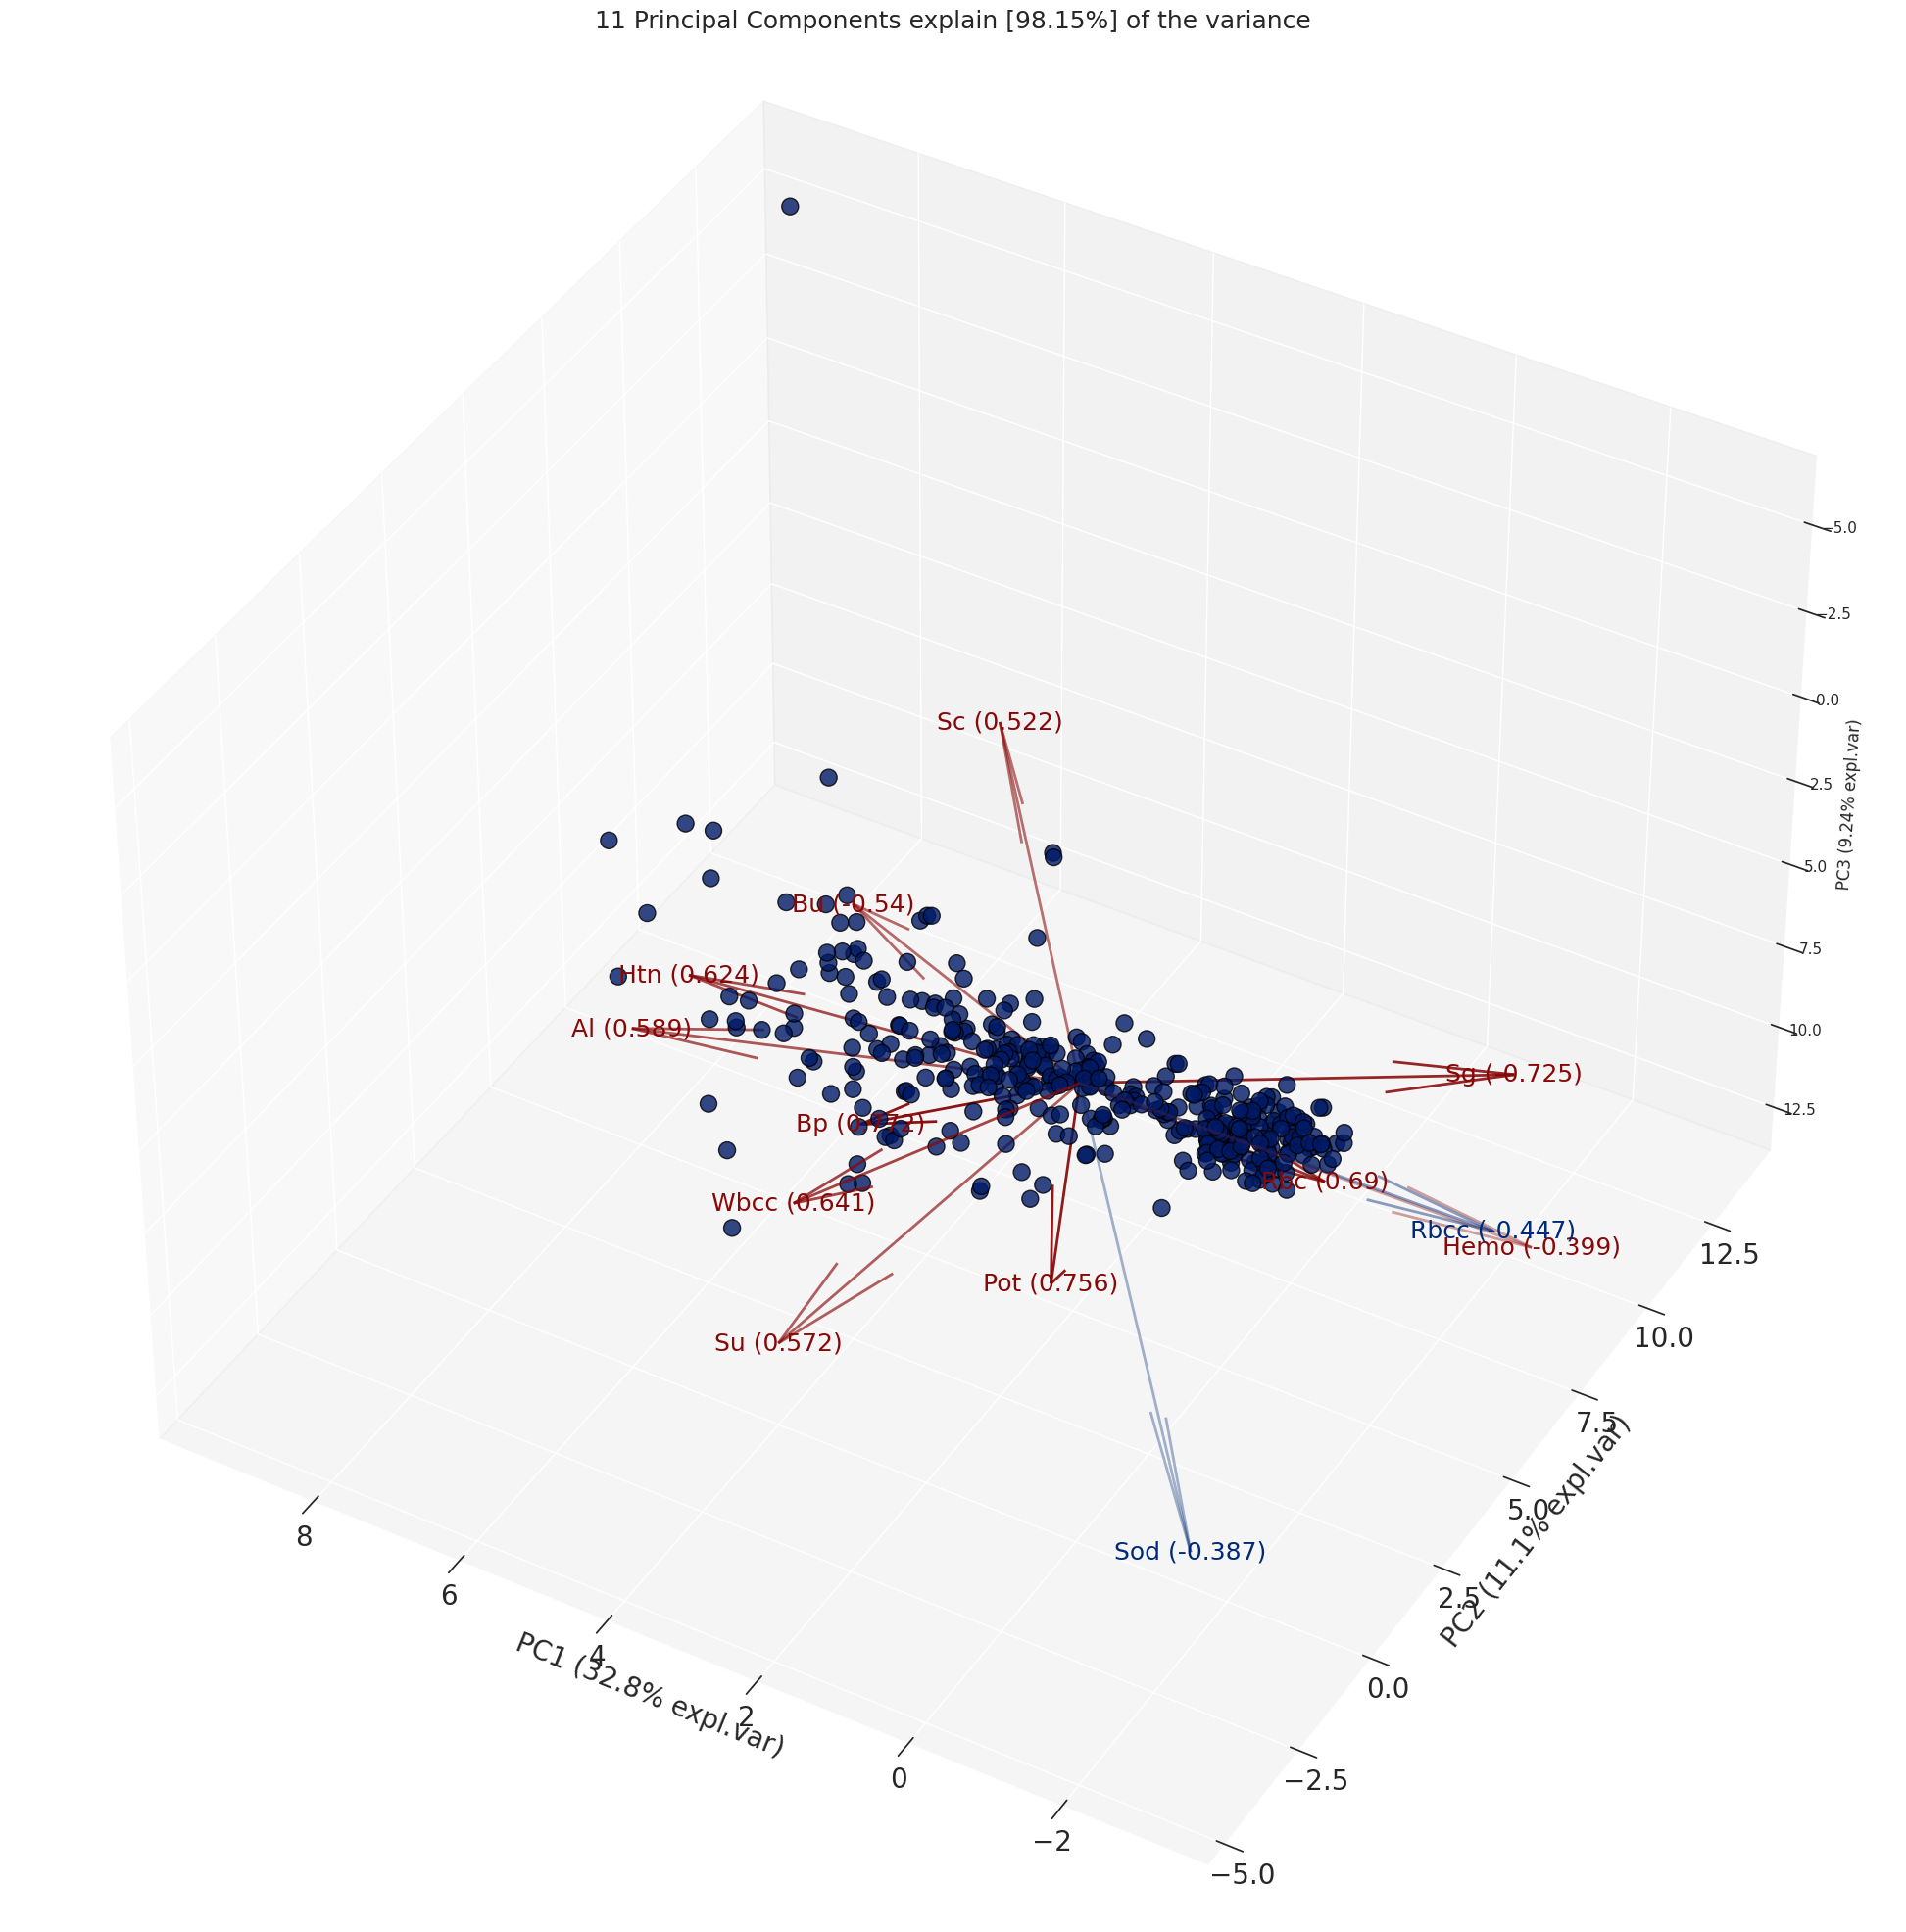

In [ ]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
# For Google Colab only
# from pycaret.utils import enable_colab
# enable_colab()

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.8, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (320, 14)
Unseen Data For Predictions: (80, 14)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
nb = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#trained model object is stored in the variable 'nb'.
dt

GaussianNB(priors=None, var_smoothing=1e-09)

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_nb = tune_model(nb)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#tuned model object is stored in the variable 'tuned_nb'.
tuned_nb

GaussianNB(priors=None, var_smoothing=0.002)

**Evaluate Decision Tree Model**

In [ ]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.